<a href="https://colab.research.google.com/github/vrlraina6-lang/TASK-2/blob/main/email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# STEP 1: Install & import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression


In [11]:
# STEP 2: Load dataset
df = pd.read_csv("spam_or_not_spam.csv")
df.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [12]:
# STEP 3: Clean dataset
df = df.dropna()
df.isna().sum()


,0
email,0
label,0


In [13]:
# STEP 4: TF-IDF transform
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['email'])
y = df['label']     # 1 = spam, 0 = not spam


In [14]:
# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [15]:
# STEP 6: Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [16]:
# STEP 7: Predict
y_pred = model.predict(X_test)


In [17]:
y_pred_class = (y_pred > 0.5).astype(int)


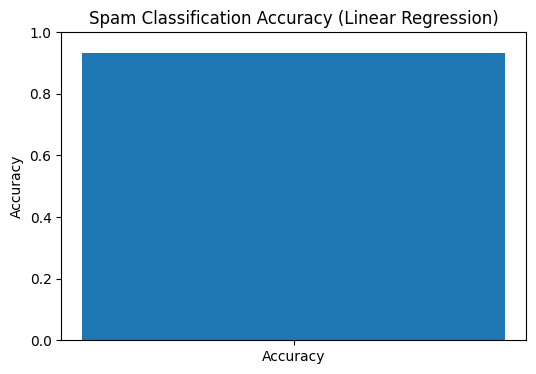

In [18]:
# STEP 8: Accuracy graph
accuracy = (y_pred_class == y_test.values).mean()

plt.figure(figsize=(6,4))
plt.bar(['Accuracy'], [accuracy])
plt.title("Spam Classification Accuracy (Linear Regression)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


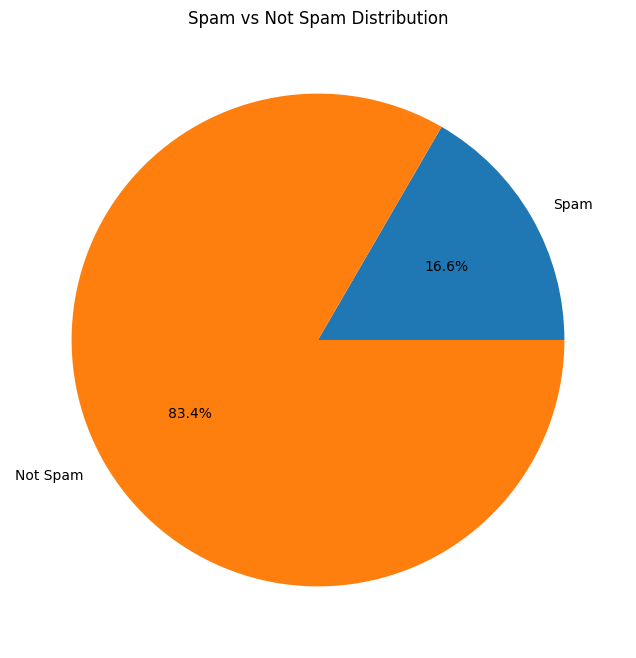

In [21]:



plt.figure(figsize=(8,8))
plt.pie([spam_count[1], spam_count[0]], labels=['Spam','Not Spam'], autopct='%1.1f%%')
plt.title('Spam vs Not Spam Distribution')
plt.show()
